In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from train_worker import gen_navigation_env, get_agent, run_episode, run_episodes

from rewards import get_reward_function
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('dqn')
init_logger('train_worker')
init_logger('environments')
init_logger('gym_minigrid_navigation.environments')

### config 

In [4]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_dqn_navigation_mlp.hocon')
config['env']['video_path'] = './video/'

In [5]:
switch_reproducibility_on(29) #config['seed'])

### environment 

In [6]:
env = gen_navigation_env(config['env'])

### agent 

In [7]:
agent = get_agent(config)

2021-03-25 13:15:26,905 INFO    dqn                    : Running on device: cuda:0


### trainings 

In [8]:
scores, steps = run_episodes(env, agent, n_episodes=config['training.n_episodes'], verbose=config['training.verbose'])

2021-03-25 13:16:52,945 INFO    train_worker           : Episode: 100. scores: -11.65, steps: 125.59, achieved: 0.83
2021-03-25 13:17:27,416 INFO    train_worker           : Episode: 200. scores: -4.06, steps: 51.60, achieved: 1.00
2021-03-25 13:18:02,486 INFO    train_worker           : Episode: 300. scores: -4.09, steps: 51.34, achieved: 0.95
2021-03-25 13:18:26,243 INFO    train_worker           : Episode: 400. scores: -2.36, steps: 34.00, achieved: 0.95
2021-03-25 13:18:52,284 INFO    train_worker           : Episode: 500. scores: -2.64, steps: 37.09, achieved: 0.97
2021-03-25 13:19:08,255 INFO    train_worker           : Episode: 600. scores: -1.18, steps: 22.81, achieved: 1.00
2021-03-25 13:19:22,113 INFO    train_worker           : Episode: 700. scores: -0.87, steps: 19.61, achieved: 0.99
2021-03-25 13:19:33,798 INFO    train_worker           : Episode: 800. scores: -0.53, steps: 16.32, achieved: 1.00
2021-03-25 13:19:42,297 INFO    train_worker           : Episode: 900. scores:

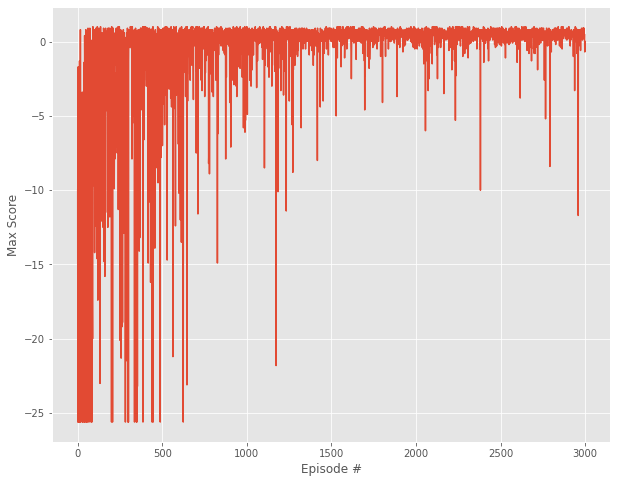

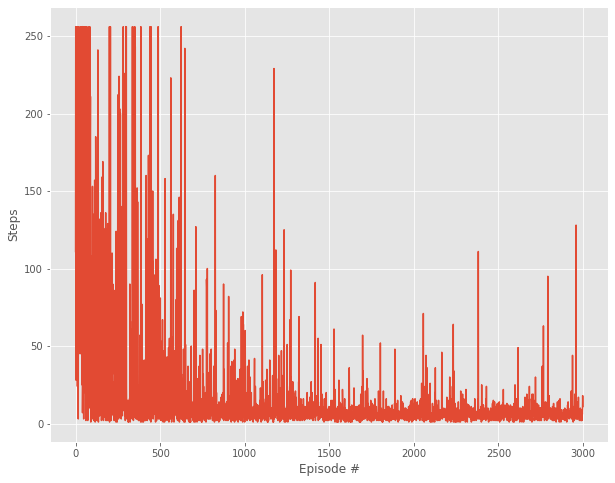

In [9]:
display_stats(scores, steps)

### visualisation 

In [24]:
import environments

env = gen_navigation_env(config['env'], verbose = True)
env = environments.visualisation_wrapper(env, config['env.video_path'])

print(run_episode(env, agent, train_mode=False))

2021-03-25 13:24:25,725 INFO    gym_minigrid_navigation.environments   : Goal: [2 5]


(0.4, 7, True)


In [25]:
show_video()